<a href="https://colab.research.google.com/github/rofiaa/MDST/blob/main/STATS_406_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("corrplot")
install.packages("gridExtra")
library(corrplot)
library(gridExtra)
library(dplyr)
library(tidyverse)

set.seed(123)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to beco

In [ ]:
credit_risk = read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTihFhC1Twb8svx-WjWC6tGGpHsu298Eu-9Pu3kgfxMPJe1ogOfXYa4WMO3hCK-SXckbYsqzA4IDB13/pub?output=csv")
head(credit_risk)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
1,22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
3,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
4,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
5,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
credit_risk

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2
26,77100,RENT,8,EDUCATION,B,35000,12.42,1,0.45,N,3
24,78956,RENT,5,MEDICAL,B,35000,11.11,1,0.44,N,4
24,83000,RENT,8,PERSONAL,A,35000,8.90,1,0.42,N,2


# EDA

## Data Exploation

```
# This is formatted as code
```



In [ ]:
# credit_risk = read.csv("credit_risk_dataset.csv")
# head(credit_risk)

In [ ]:
dim(credit_risk)

[1] 32581    12

In [ ]:
colnames(credit_risk)

[1] "person_age"                 "person_income"             
 [3] "person_home_ownership"      "person_emp_length"         
 [5] "loan_intent"                "loan_grade"                
 [7] "loan_amnt"                  "loan_int_rate"             
 [9] "loan_status"                "loan_percent_income"       
[11] "cb_person_default_on_file"  "cb_person_cred_hist_length"

## Data Cleaning

In [ ]:
cleaned_credit_data <- credit_risk |>
  filter((!is.na(loan_int_rate)) & (!is.na(person_emp_length))) |>
  filter(person_emp_length < 100) |>
  filter(person_age < 100)

In [ ]:
# table(cleaned_credit_data$loan_status)
# loan_status_dist <- ggplot(aes(x = loan_status)) +


## Data Visualization

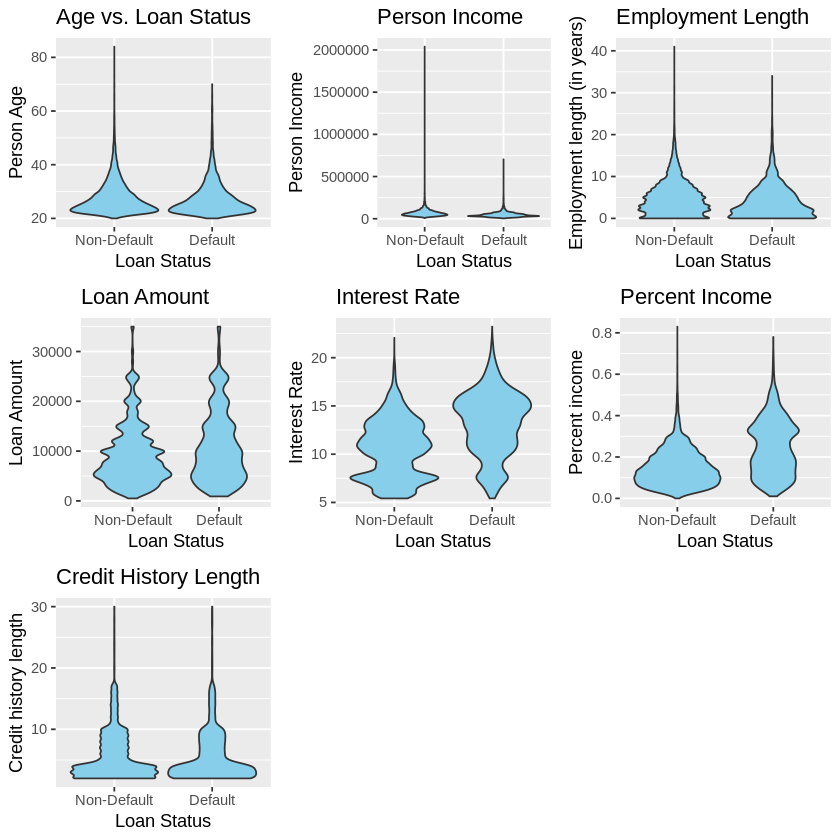

In [ ]:
numerical_vars <- cleaned_credit_data[, c("person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
                                          "loan_percent_income", "cb_person_cred_hist_length", "loan_status")]

numerical_vars$loan_status <- factor(numerical_vars$loan_status, levels = c(0, 1), labels = c("Non-Default", "Default"))

p1 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = person_age)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Age vs. Loan Status", x = "Loan Status", y = "Person Age")

p2 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = person_income)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Person Income", x = "Loan Status", y = "Person Income")

p3 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = person_emp_length)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Employment Length", x = "Loan Status", y = "Employment length (in years)")

p4 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = loan_amnt)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Loan Amount", x = "Loan Status", y = "Loan Amount")

p5 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = loan_int_rate)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Interest Rate", x = "Loan Status", y = "Interest Rate")

p6 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = loan_percent_income)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Percent Income", x = "Loan Status", y = "Percent income")

p7 <- ggplot(numerical_vars, aes(x = factor(loan_status), y = cb_person_cred_hist_length)) +
  geom_violin(fill = "skyblue") +
  labs(title = "Credit History Length", x = "Loan Status", y = "Credit history length")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, nrow = 3)

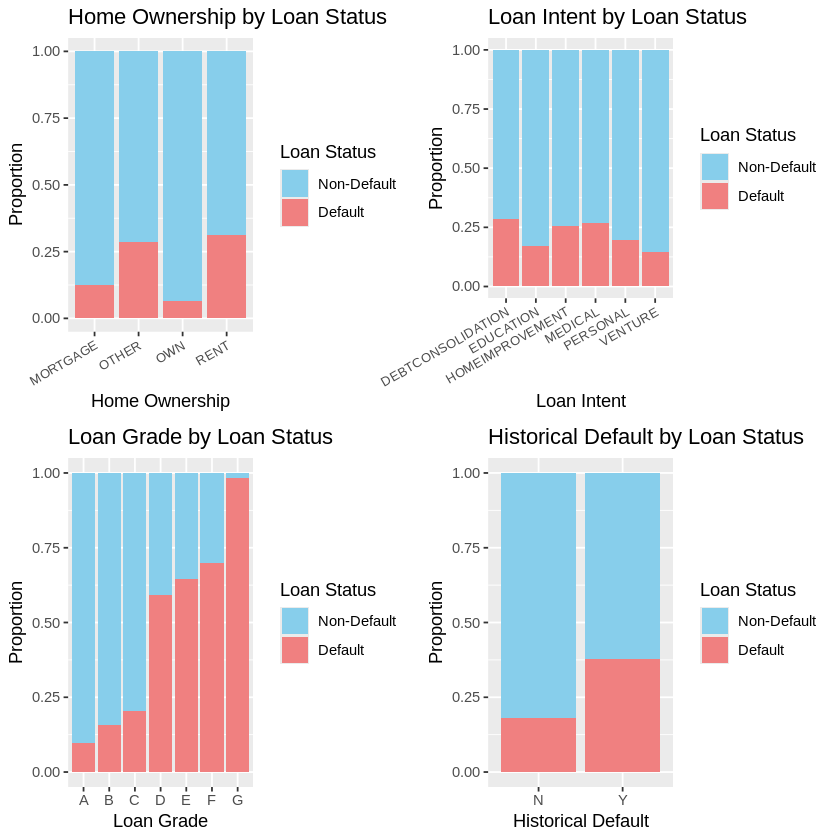

In [ ]:
c1 <- ggplot(cleaned_credit_data, aes(x = factor(person_home_ownership), fill = factor(loan_status))) +
  geom_bar(position = "fill") +
  labs(title = "Home Ownership by Loan Status", x = "Home Ownership", y = "Proportion", fill = "Loan Status") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "lightcoral"), labels = c("0" = "Non-Default", "1" = "Default")) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1, size = 8))

c2 <- ggplot(cleaned_credit_data, aes(x = factor(loan_intent), fill = factor(loan_status))) +
  geom_bar(position = "fill") +
  labs(title = "Loan Intent by Loan Status", x = "Loan Intent", y = "Proportion", fill = "Loan Status") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "lightcoral"), labels = c("0" = "Non-Default", "1" = "Default")) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1, size = 8))

c3 <- ggplot(cleaned_credit_data, aes(x = factor(loan_grade), fill = factor(loan_status))) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "lightcoral"), labels = c("0" = "Non-Default", "1" = "Default")) +
  labs(title = "Loan Grade by Loan Status", x = "Loan Grade", y = "Proportion", fill = "Loan Status")

c4 <- ggplot(cleaned_credit_data, aes(x = factor(cb_person_default_on_file), fill = factor(loan_status))) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "lightcoral"), labels = c("0" = "Non-Default", "1" = "Default")) +
  labs(title = "Historical Default by Loan Status", x = "Historical Default", y = "Proportion", fill = "Loan Status")

grid.arrange(c1, c2, c3, c4, nrow = 2)

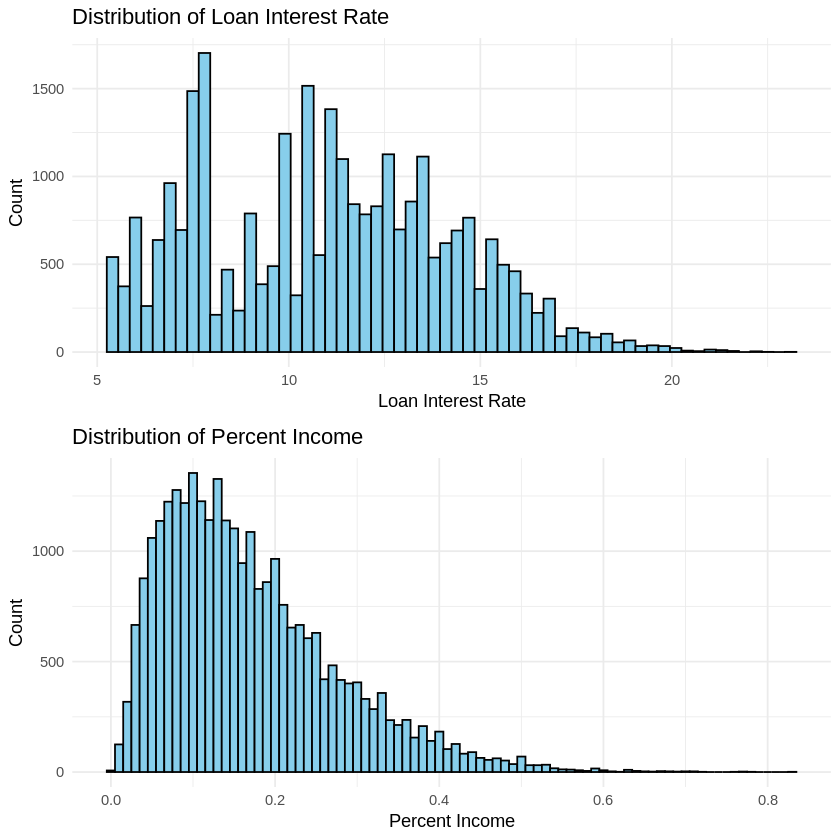

In [ ]:
# the distribution of percent income
plot1 <- ggplot(cleaned_credit_data, aes(x = loan_percent_income)) +
  geom_histogram(binwidth = 0.01, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Percent Income", x = "Percent Income", y = "Count") +
  theme_minimal()

# the distribution of loan interest rate
plot2 <- ggplot(cleaned_credit_data, aes(x = loan_int_rate)) +
  geom_histogram(binwidth = 0.3, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Loan Interest Rate", x = "Loan Interest Rate", y = "Count") +
  theme_minimal()


grid.arrange(plot2, plot1)

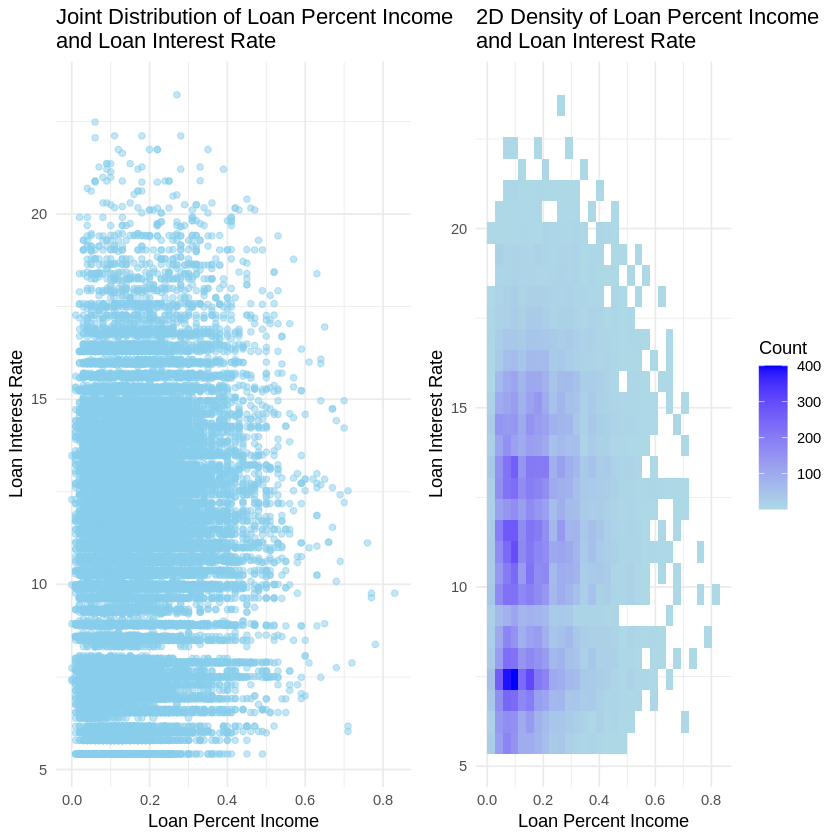

In [55]:
# Scatter plot for joint distribution
scatter_plot <- ggplot(cleaned_credit_data, aes(x = loan_percent_income, y = loan_int_rate)) +
  geom_point(alpha = 0.5, color = "skyblue") +
  labs(title = "Joint Distribution of Loan Percent Income\nand Loan Interest Rate",
       x = "Loan Percent Income",
       y = "Loan Interest Rate") +
  theme_minimal()

# 2D density plot for joint distribution
density_plot <- ggplot(cleaned_credit_data, aes(x = loan_percent_income, y = loan_int_rate)) +
  geom_bin2d(bins = 30, aes(fill = ..count..)) +
  scale_fill_gradient(low = "lightblue", high = "blue", name = "Count") +
  labs(title = "2D Density of Loan Percent Income\nand Loan Interest Rate",
       x = "Loan Percent Income",
       y = "Loan Interest Rate") +
  theme_minimal()

# Arrange plots side by side
grid.arrange(scatter_plot, density_plot, ncol = 2)

In [ ]:
# # the distribution of loan amounts
# ggplot(cleaned_credit_data, aes(x = loan_)) +
#   geom_histogram(binwidth = 1000, fill = "blue", color = "black") +
#   labs(title = "Distribution of Loan Amounts", x = "Loan Amount", y = "Count")

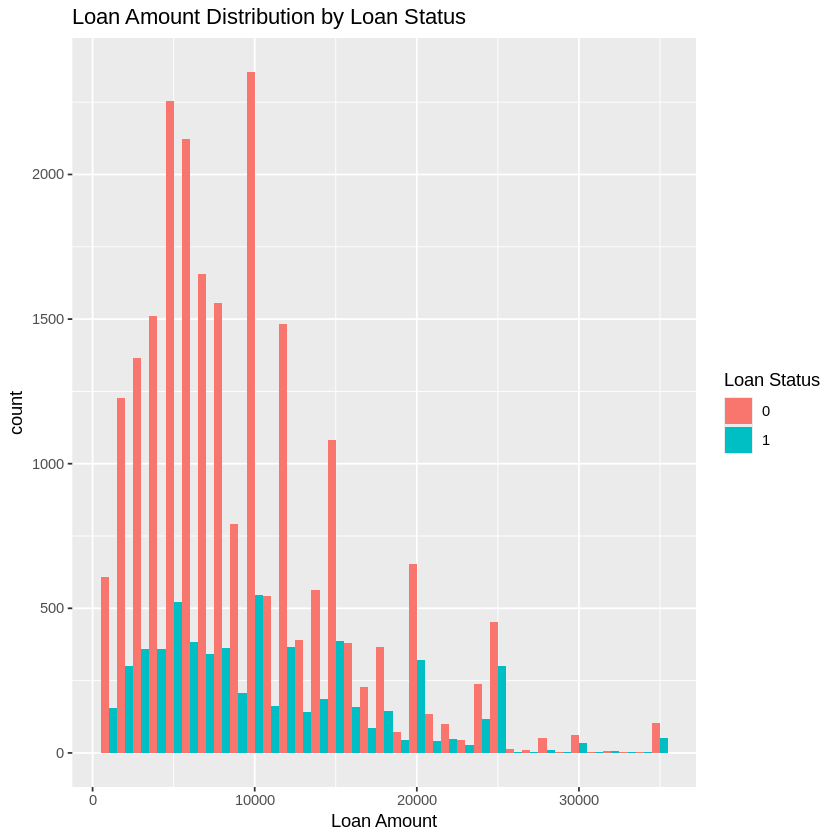

In [ ]:
# the relationship between loan amounts and loan status
ggplot(cleaned_credit_data, aes(x = loan_amnt, fill = factor(loan_status))) +
  geom_histogram(binwidth = 1000, position = "dodge") +
  labs(title = "Loan Amount Distribution by Loan Status", x = "Loan Amount", fill = "Loan Status")

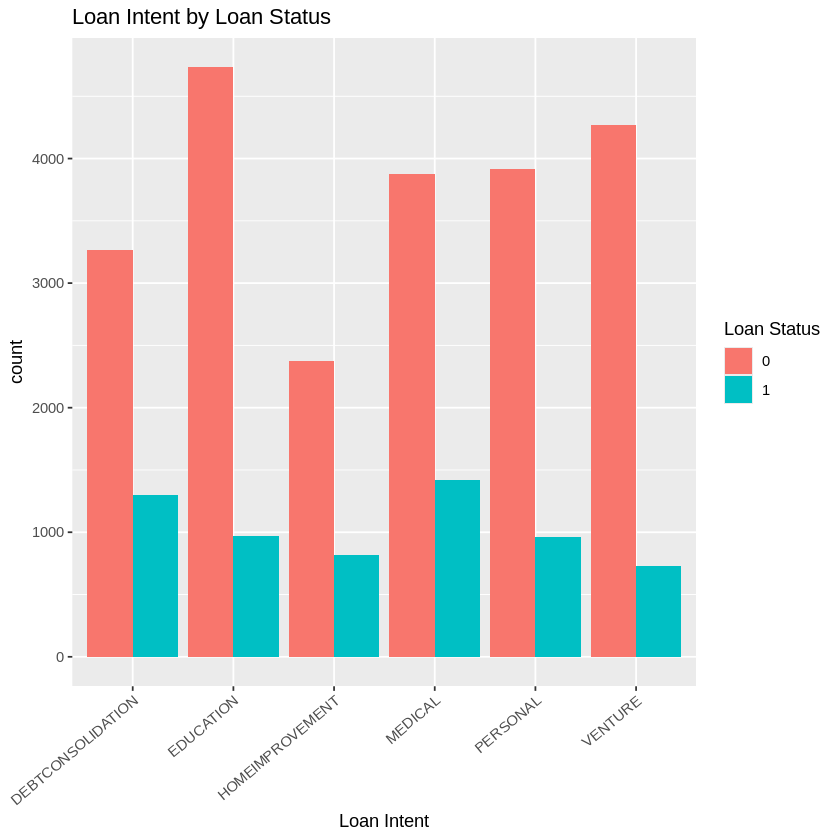

In [ ]:
# the count of loans based on loan intent and loan status
ggplot(cleaned_credit_data, aes(x = loan_intent, fill = factor(loan_status))) +
  geom_bar(position = "dodge") +
  labs(title = "Loan Intent by Loan Status", x = "Loan Intent", fill = "Loan Status") +
  theme(axis.text.x = element_text(angle = 40, hjust = 1))

function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x5d164e03e788>
<environment: namespace:base>

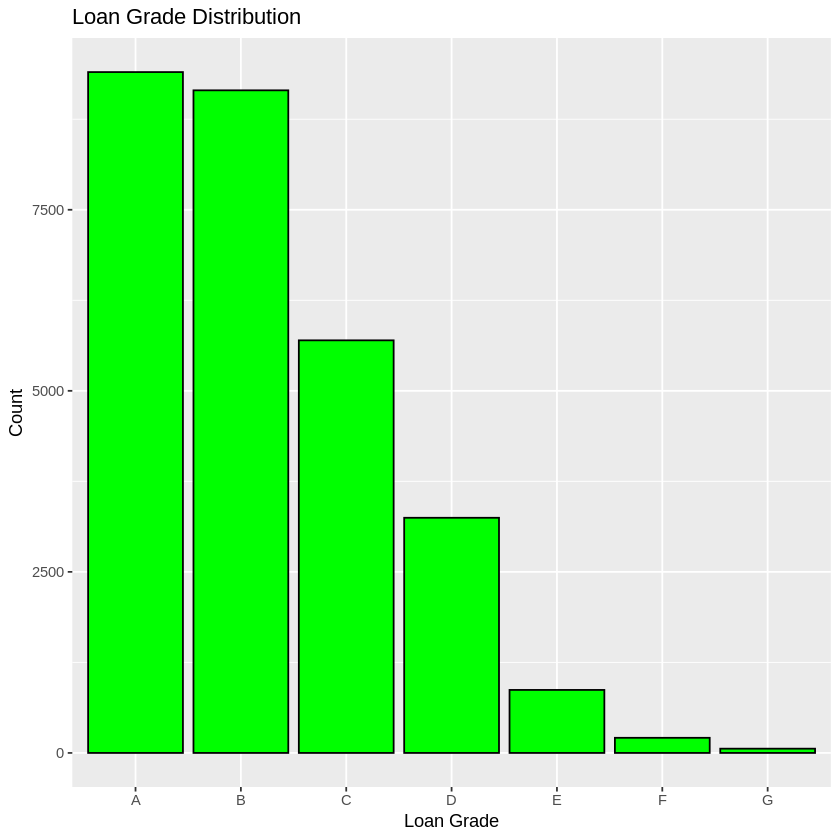

In [ ]:
# the distribution of loans by grade
ggplot(cleaned_credit_data, aes(x = loan_grade)) +
  geom_bar(fill = "green", color = "black") +
  labs(title = "Loan Grade Distribution", x = "Loan Grade", y = "Count")
plot

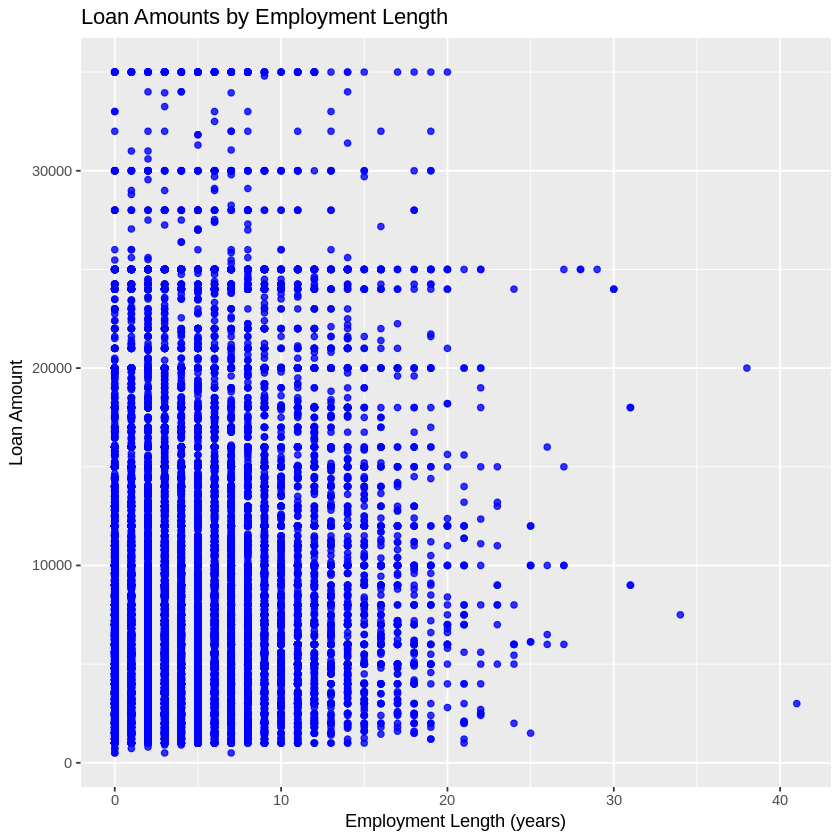

In [ ]:
# the relationship between employment length and loan amounts
ggplot(cleaned_credit_data, aes(x = person_emp_length, y = loan_amnt)) +
  geom_point(alpha = 0.8, color = "blue") +
  labs(title = "Loan Amounts by Employment Length", x = "Employment Length (years)", y = "Loan Amount")

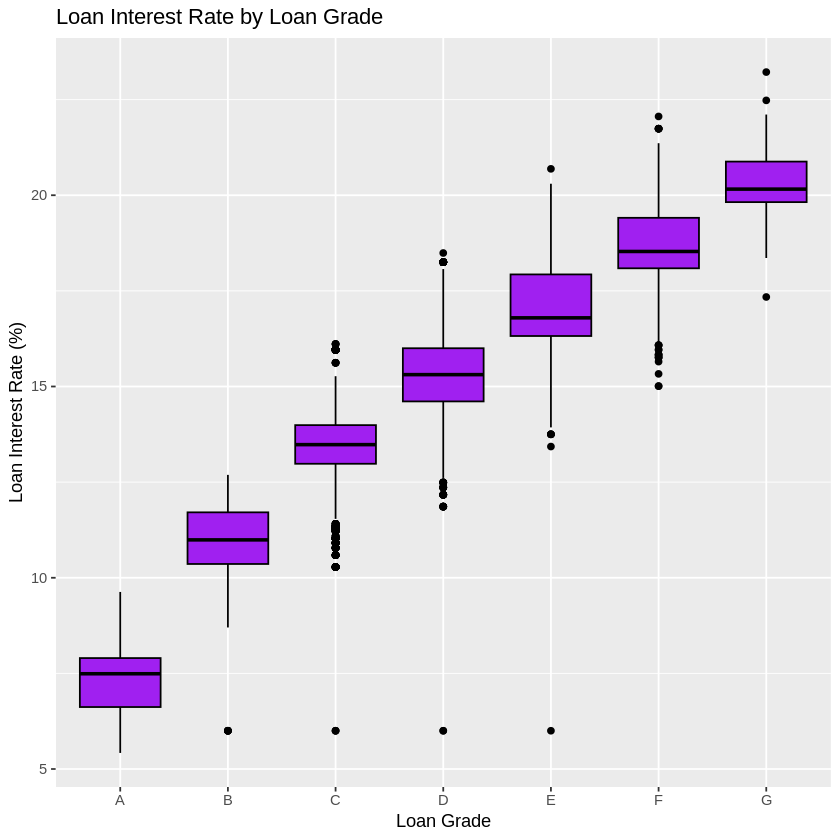

In [ ]:
# the loan interest rates across different loan grades
ggplot(cleaned_credit_data, aes(x = loan_grade, y = loan_int_rate)) +
  geom_boxplot(fill = "purple", color = "black") +
  labs(title = "Loan Interest Rate by Loan Grade", x = "Loan Grade", y = "Loan Interest Rate (%)")

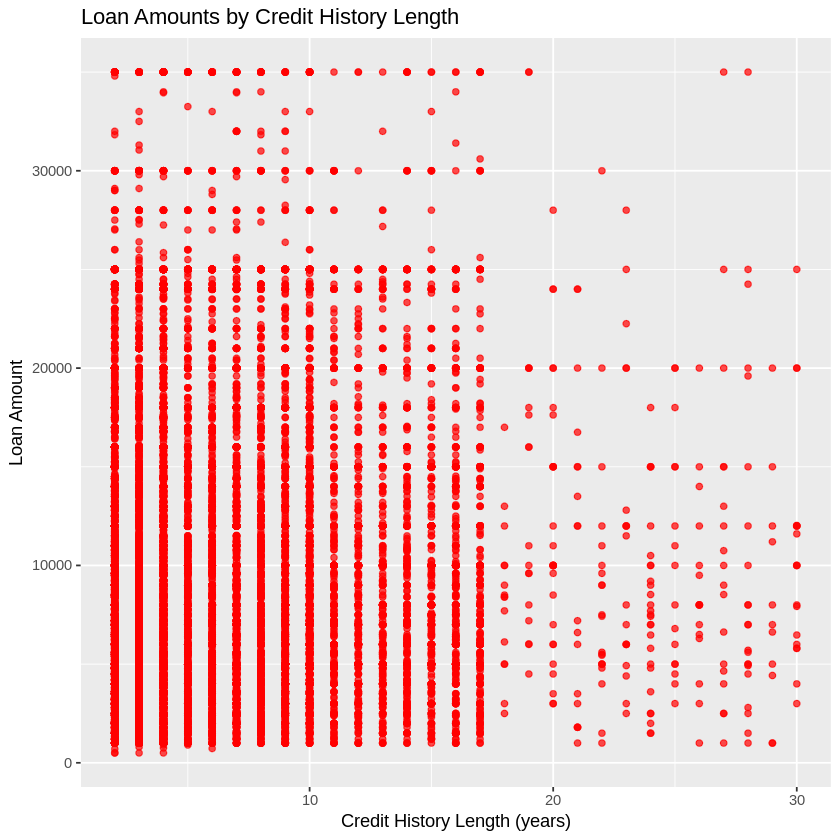

In [ ]:
# the relationship between credit history length and loan amounts
ggplot(cleaned_credit_data, aes(x = cb_person_cred_hist_length, y = loan_amnt)) +
  geom_point(alpha = 0.7, color = "red") +
  labs(title = "Loan Amounts by Credit History Length", x = "Credit History Length (years)", y = "Loan Amount")

## Feature Selection

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	28632 obs. of  12 variables:
 $ person_age                : int  21 25 23 24 21 26 24 24 21 22 ...
 $ person_income             : int  9600 9600 65500 54400 9900 77100 78956 83000 10000 85000 ...
 $ person_home_ownership     : chr  "OWN" "MORTGAGE" "RENT" "RENT" ...
 $ person_emp_length         : int  5 1 4 8 2 8 5 8 6 6 ...
 $ loan_intent               : chr  "EDUCATION" "MEDICAL" "MEDICAL" "MEDICAL" ...
 $ loan_grade                : chr  "B" "C" "C" "C" ...
 $ loan_amnt                 : int  1000 5500 35000 35000 2500 35000 35000 35000 1600 35000 ...
 $ loan_int_rate             : num  11.14 12.87 15.23 14.27 7.14 ...
 $ loan_status               : int  0 1 1 1 1 1 1 1 1 1 ...
 $ loan_percent_income       : num  0.1 0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16 0.41 ...
 $ cb_person_default_on_file : chr  "N" "N" "N" "Y" ...
 $ cb_person_cred_hist_length: int  2 3 2 4 2 3 4 2 3 4 ...


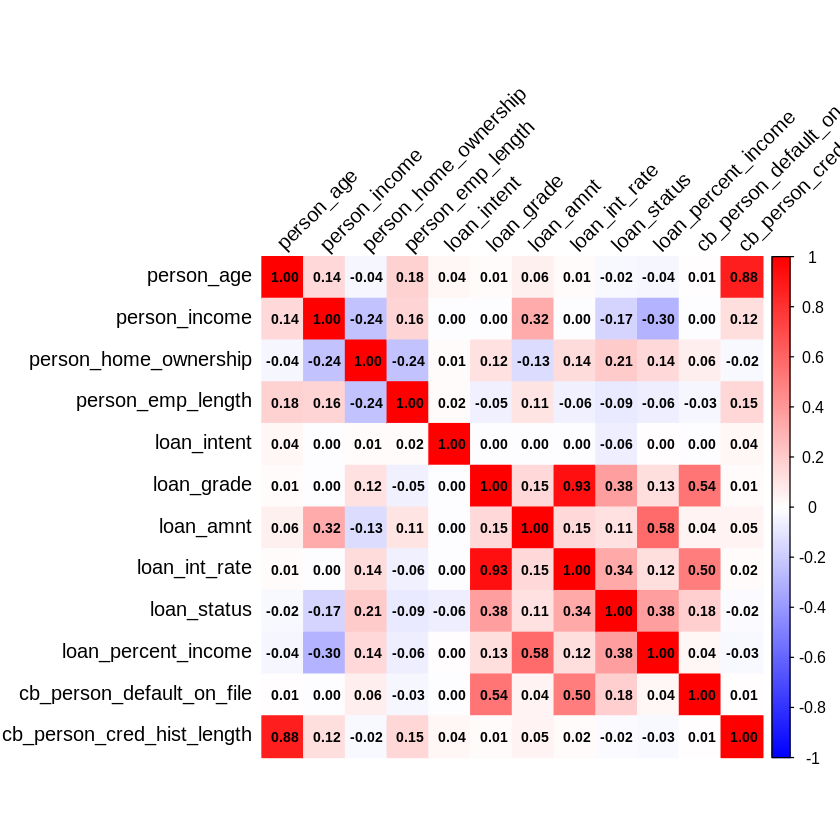

In [ ]:
# Load necessary libraries
library(ggplot2)
library(corrplot)

data <- cleaned_credit_data
str(data)

# Convert categorical variables to numeric using encoding (you can adjust based on your project needs)
data$person_home_ownership <- as.numeric(factor(data$person_home_ownership))
data$loan_intent <- as.numeric(factor(data$loan_intent))
data$loan_grade <- as.numeric(factor(data$loan_grade))
data$cb_person_default_on_file <- as.numeric(factor(data$cb_person_default_on_file))

# Assuming your correlation matrix is ready
correlation_matrix <- cor(data[sapply(data, is.numeric)])

# Plot the full correlation matrix with better number formatting
corrplot(correlation_matrix, method = "color", tl.col = "black", tl.srt = 45,
         addCoef.col = "black", # Adds correlation coefficients
         number.cex = 0.7,      # Adjusts the size of the numbers
         col = colorRampPalette(c("blue", "white", "red"))(200))

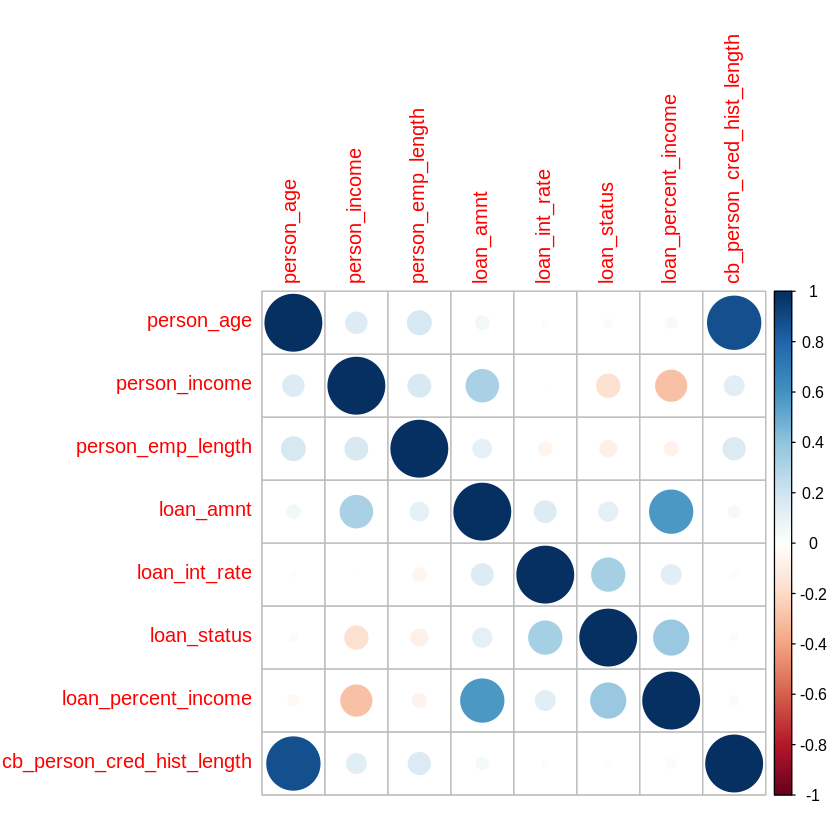

In [ ]:
cor_matrix <- cor(cleaned_credit_data[, sapply(cleaned_credit_data, is.numeric)], use = "complete.obs")
corrplot(cor_matrix, method = "circle")

## Simulation

#Synthetic Data Generation

In [ ]:
set.seed(123)
n <- 1000  # Number of samples

mean_int_rate <- mean(cleaned_credit_data$loan_int_rate)
sd_int_rate <- sd(cleaned_credit_data$loan_int_rate)

mean_percent_income <- mean(cleaned_credit_data$loan_percent_income)
sd_percent_income <- sd(cleaned_credit_data$loan_percent_income)

meanlog <- log(mean_percent_income^2 / sqrt(sd_percent_income^2 + mean_percent_income^2))
sdlog <- sqrt(log(1 + (sd_percent_income^2 / mean_percent_income^2)))

diff_int_rate = abs(diff(mean_int_rate))
diff_percent_income = abs(diff(mean_percent_income))

# Generate predictors
loan_int_rate <- rnorm(n, mean = mean_int_rate, sd = sd_int_rate)  # Normal distribution
loan_percent_income <- rlnorm(n, meanlog = meanlog, sdlog = sdlog)  # Log-normal distribution

In [ ]:
# Fit logistic regression to the original data
logit_model <- glm(loan_status ~ loan_int_rate + loan_percent_income,
                   data = cleaned_credit_data,
                   family = binomial)

# Extract coefficients
beta_0 <- coef(logit_model)[1]  # Intercept
beta_1 <- coef(logit_model)[2]  # Coefficient for loan_int_rate
beta_2 <- coef(logit_model)[3]  # Coefficient for loan_percent_income

# Print coefficients
cat("Beta_0:", beta_0, "\nBeta_1:", beta_1, "\nBeta_2:", beta_2, "\n")

# Simulate binary outcomes using fitted coefficients
prob <- 1 / (1 + exp(-(beta_0 + beta_1 * loan_int_rate + beta_2 * loan_percent_income)))
loan_status <- rbinom(n, size = 1, prob = prob)

# Create the simulated dataset
synthetic_data1 <- data.frame(loan_int_rate, loan_percent_income, loan_status)


head(synthetic_data1)

Beta_0: -6.393928 
Beta_1: 0.2910196 
Beta_2: 8.643062 


,loan_int_rate,loan_percent_income,loan_status
,<dbl>,<dbl>,<int>
1,9.229696,0.08087961,0
2,10.296364,0.07884766,0
3,16.073409,0.14208254,0
4,11.267402,0.13303415,0
5,11.457224,0.03304156,0
6,16.578348,0.26148487,1


In [ ]:
# Check distribution of simulated loan_status
table(synthetic_data1$loan_status) / nrow(synthetic_data1)

# Fit logistic regression to simulated data
logit_model_sim <- glm(loan_status ~ loan_int_rate + loan_percent_income,
                       data = synthetic_data1,
                       family = binomial)
summary(logit_model_sim)


    0     1 
0.807 0.193 


Call:
glm(formula = loan_status ~ loan_int_rate + loan_percent_income, 
    family = binomial, data = synthetic_data1)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -7.53238    0.52966  -14.22   <2e-16 ***
loan_int_rate        0.33915    0.03422    9.91   <2e-16 ***
loan_percent_income 10.32524    0.97965   10.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 981.09  on 999  degrees of freedom
Residual deviance: 708.15  on 997  degrees of freedom
AIC: 714.15

Number of Fisher Scoring iterations: 5


# Resampling Methods

Bootstrap

In [ ]:
library(boot)

In [ ]:
start_time <- Sys.time()

# Define the bootstrap function for the mean
bootstrap_mean <- function(data, indices) {
  # Resample data
  sample_data <- data[indices, ]

  # Calculate the mean for interest rate and percent income
  c(mean_interest_rate = mean(sample_data$loan_int_rate, na.rm = TRUE),
    mean_percent_income = mean(sample_data$loan_percent_income, na.rm = TRUE))
}

# Perform bootstrap resampling
set.seed(123)  # For reproducibility
boot_results <- boot(data = synthetic_data1,
                     statistic = bootstrap_mean,
                     R = 1000)  # Number of replications

# Display bootstrap results
print(boot_results)

# Estimate bias and standard error
bias <- boot_results$t0 - colMeans(boot_results$t)
se <- apply(boot_results$t, 2, sd)

cat("Bias:\n")
print(bias)
cat("\nStandard Errors:\n")
print(se)

results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = synthetic_data1, statistic = bootstrap_mean, R = 1000)


Bootstrap Statistics :
      original       bias    std. error
t1* 11.0917849 4.475785e-03 0.102084671
t2*  0.1741532 4.545145e-05 0.003518522
Bias:
 mean_interest_rate mean_percent_income 
      -4.475785e-03       -4.545145e-05 

Standard Errors:
[1] 0.102084671 0.003518522
Runtime: 0.8227043 


Loan Interest Rate - Observed Median Difference: 2.778431 
Loan Interest Rate - 95% CI: [ 1.956436 , 3.324342 ]
Loan Percent Income - Observed Median Difference: 0.09972682 
Loan Percent Income - 95% CI: [ 0.07119186 , 0.1253105 ]
Runtime: 0.6269264 


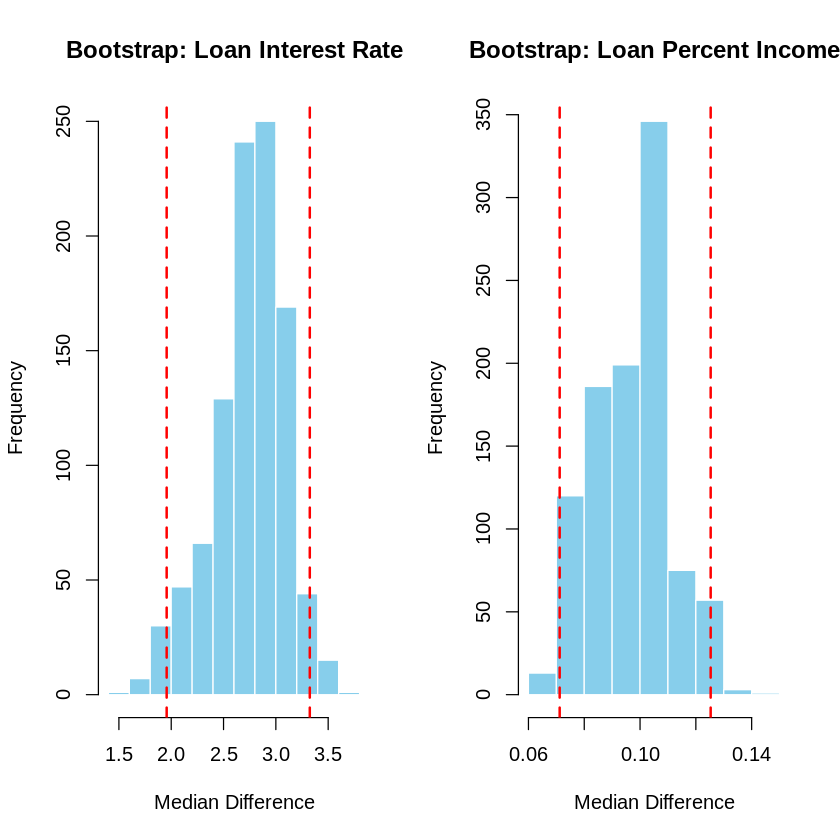

In [ ]:
set.seed(123)

start_time <- Sys.time()
# Define the bootstrap function
bootstrap_median_diff <- function(data, predictor, response, n_bootstrap = 1000, ci_level = 0.95) {
  # Split data into groups based on response
  group1 <- data[[predictor]][data[[response]] == 1]  # Defaulters
  group2 <- data[[predictor]][data[[response]] == 0]  # Non-defaulters

  # Observed median difference
  observed_median_diff <- median(group1) - median(group2)

  # Bootstrap sampling
  bootstrap_diffs <- numeric(n_bootstrap)
  set.seed(123)  # For reproducibility
  for (i in 1:n_bootstrap) {
    resample_group1 <- sample(group1, size = length(group1), replace = TRUE)
    resample_group2 <- sample(group2, size = length(group2), replace = TRUE)
    bootstrap_diffs[i] <- median(resample_group1) - median(resample_group2)
  }

  # Confidence interval
  lower_bound <- quantile(bootstrap_diffs, probs = (1 - ci_level) / 2)
  upper_bound <- quantile(bootstrap_diffs, probs = 1 - (1 - ci_level) / 2)

  # Return results
  list(
    observed_median_diff = observed_median_diff,
    ci_lower = lower_bound,
    ci_upper = upper_bound,
    bootstrap_diffs = bootstrap_diffs
  )
}

# Run the bootstrap for Loan Interest Rate
result_interest <- bootstrap_median_diff(synthetic_data1, predictor = "loan_int_rate", response = "loan_status")
cat("Loan Interest Rate - Observed Median Difference:", result_interest$observed_median_diff, "\n")
cat("Loan Interest Rate - 95% CI: [", result_interest$ci_lower, ",", result_interest$ci_upper, "]\n")

# Run the bootstrap for Loan Percent Income
result_income <- bootstrap_median_diff(synthetic_data1, predictor = "loan_percent_income", response = "loan_status")
cat("Loan Percent Income - Observed Median Difference:", result_income$observed_median_diff, "\n")
cat("Loan Percent Income - 95% CI: [", result_income$ci_lower, ",", result_income$ci_upper, "]\n")

# Plot bootstrap distributions
par(mfrow = c(1, 2))
hist(result_interest$bootstrap_diffs, main = "Bootstrap: Loan Interest Rate",
     xlab = "Median Difference", col = "skyblue", border = "white")
abline(v = c(result_interest$ci_lower, result_interest$ci_upper), col = "red", lwd = 2, lty = 2)

hist(result_income$bootstrap_diffs, main = "Bootstrap: Loan Percent Income",
     xlab = "Median Difference", col = "skyblue", border = "white")
abline(v = c(result_income$ci_lower, result_income$ci_upper), col = "red", lwd = 2, lty = 2)


results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

Permutation

P-value for Loan Interest Rate: 0e+00 
P-value for Loan Percent Income: 0e+00 
# A tibble: 1 × 2
  diff_int_rate diff_percent_income
          <dbl>               <dbl>
1          2.72               0.114
Type I Error for Interest Rate: 0e+00 
Type I Error for Percent Income: 0e+00 
Runtime: 8.947613 


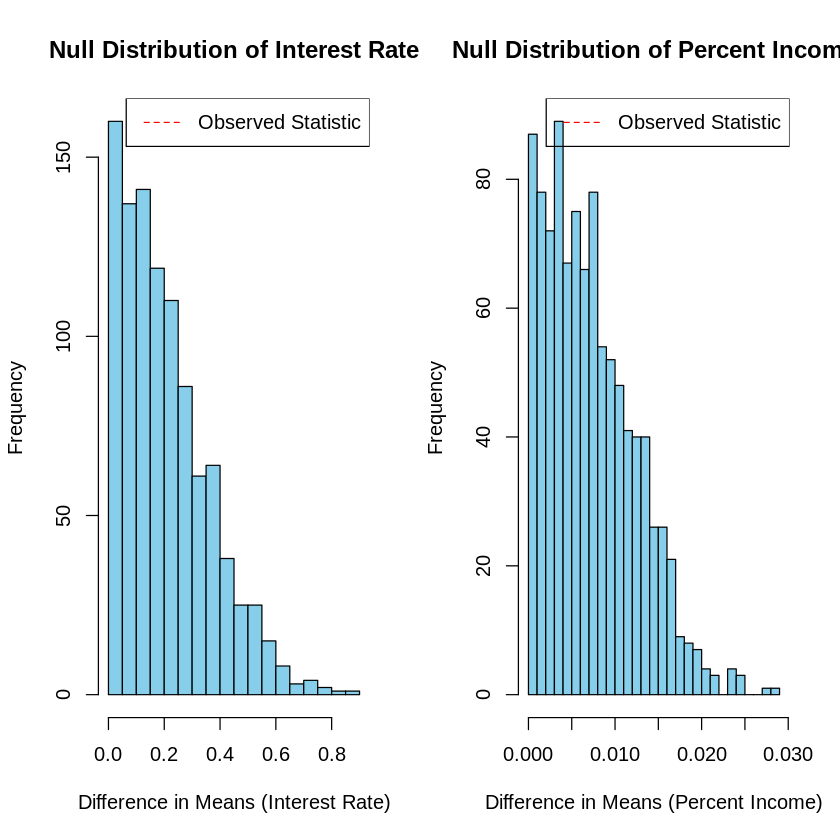

In [ ]:
start_time_1 <- Sys.time()

# Compute Observed Test Statistic
observed_stat <- synthetic_data1 %>%
  group_by(loan_status) %>%
  summarize(
    mean_int_rate = mean(loan_int_rate),
    mean_percent_income = mean(loan_percent_income)
  ) %>%
  summarize(
    diff_int_rate = abs(diff(mean_int_rate)),
    diff_percent_income = abs(diff(mean_percent_income))
  )

# Permutation Test
B <- 1000  # Number of permutations
perm_stats <- replicate(B, {
  # Shuffle the loan_status labels
  permuted_labels <- sample(synthetic_data1$loan_status)
  permuted_data <- synthetic_data1 %>% mutate(loan_status = permuted_labels)

  # Calculate permuted test statistics
  perm_stat <- permuted_data %>%
    group_by(loan_status) %>%
    summarize(
      mean_int_rate = mean(loan_int_rate),
      mean_percent_income = mean(loan_percent_income)
    ) %>%
    summarize(
      diff_int_rate = abs(diff(mean_int_rate)),
      diff_percent_income = abs(diff(mean_percent_income))
    )

  unlist(perm_stat)
})

# P-value Calculation
perm_stats <- t(perm_stats)  # Transpose for easier manipulation
p_value_int_rate <- mean(perm_stats[, 1] >= observed_stat$diff_int_rate)
p_value_percent_income <- mean(perm_stats[, 2] >= observed_stat$diff_percent_income)

# Output Results
cat("P-value for Loan Interest Rate:", format(p_value_int_rate, scientific = TRUE, digits = 5), "\n")
cat("P-value for Loan Percent Income:", format(p_value_percent_income, scientific = TRUE, digits = 5), "\n")

# Visualize Null Distributions
par(mfrow = c(1, 2))  # Side-by-side plots

hist(perm_stats[, 1], main = "Null Distribution of Interest Rate",
     xlab = "Difference in Means (Interest Rate)", col = "skyblue", breaks = 30)
abline(v = observed_stat$diff_int_rate, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Observed Statistic"), col = c("red"), lty = 2)

hist(perm_stats[, 2], main = "Null Distribution of Percent Income",
     xlab = "Difference in Means (Percent Income)", col = "skyblue", breaks = 30)
abline(v = observed_stat$diff_percent_income, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Observed Statistic"), col = c("red"), lty = 2)

# Analyze Operating Characteristics
# Type I Error Simulation
type1_error <- replicate(100, {
  # Shuffle loan_status to simulate null hypothesis
  synthetic_data_null <- synthetic_data1 %>%
    mutate(loan_status = sample(loan_status))

  # Compute test statistics under null hypothesis
  perm_stat <- synthetic_data_null %>%
    group_by(loan_status) %>%
    summarize(
      mean_int_rate = mean(loan_int_rate),
      mean_percent_income = mean(loan_percent_income)
    ) %>%
    summarize(
      diff_int_rate = abs(diff(mean_int_rate)),
      diff_percent_income = abs(diff(mean_percent_income))
    )

  unlist(perm_stat)
})

type1_error <- t(type1_error)  # Ensure proper dimensions

print(observed_stat)

# Calculate Type I Error Rates
type1_error_int_rate <- mean(type1_error[, 1] >= observed_stat$diff_int_rate)
type1_error_percent_income <- mean(type1_error[, 2] >= observed_stat$diff_percent_income)

# Output Type I Error Results
cat("Type I Error for Interest Rate:", format(type1_error_int_rate, scientific = TRUE, digits = 5), "\n")
cat("Type I Error for Percent Income:", format(type1_error_percent_income, scientific = TRUE, digits = 5), "\n")

# Total Runtime
end_time_1 <- Sys.time()
runtime <- end_time_1 - start_time_1
cat("Runtime:", runtime, "\n")

OLS


Call:
lm(formula = loan_int_rate ~ loan_status, data = synthetic_data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6004 -1.9137  0.1279  1.9831  9.1441 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.5662     0.1062   99.45   <2e-16 ***
loan_status   2.7234     0.2418   11.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.018 on 998 degrees of freedom
Multiple R-squared:  0.1127,	Adjusted R-squared:  0.1119 
F-statistic: 126.8 on 1 and 998 DF,  p-value: < 2.2e-16



Call:
lm(formula = loan_percent_income ~ loan_status, data = synthetic_data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20726 -0.06663 -0.01950  0.04579  0.74656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.152149   0.003562   42.72   <2e-16 ***
loan_status 0.114013   0.008108   14.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1012 on 998 degrees of freedom
Multiple R-squared:  0.1654,	Adjusted R-squared:  0.1645 
F-statistic: 197.8 on 1 and 998 DF,  p-value: < 2.2e-16


Loan Interest Rate OLS Estimates:
(Intercept) loan_status 
  10.566160    2.723444 

Loan Percent Income OLS Estimates:
(Intercept) loan_status 
  0.1521488   0.1140127 
Loan Interest Rate:
Mean Absolute Error (MAE): 2.402262 
Root Mean Squared Error (RMSE): 3.015144 

Loan Percent Income:
Mean Absolute Error (MAE): 0.07336279 
Root Mean Squared Error (RMSE): 0.101081 

Model Metrics:
Accuracy: 0.193 
Precision: 0.193 
Recall: 1 
F1-Score: 0.3235541 
Runtime: 0.1026924 


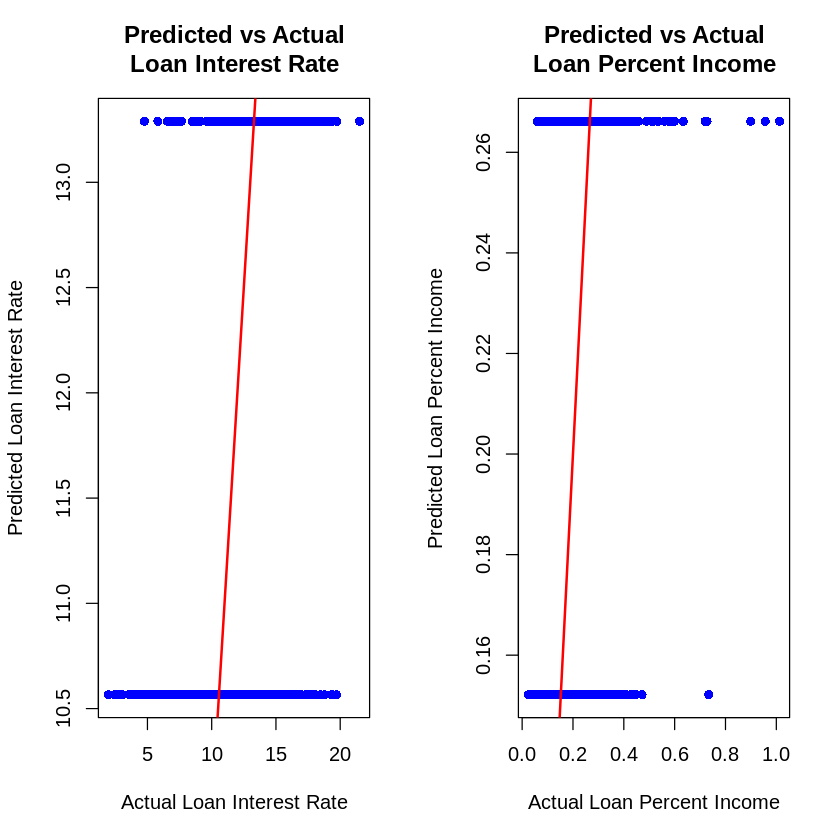

In [ ]:
start_time <- Sys.time()

# Set seed for reproducibility
set.seed(123)

# Load required libraries
library(dplyr)

# Assuming synthetic_data1 is your dataframe and loan_int_rate, loan_percent_income, loan_status are columns
# Fit the OLS regression model for Loan Interest Rate and Loan Percent Income

# Loan Interest Rate OLS Regression
model_loan_int_rate <- lm(loan_int_rate ~ loan_status, data = synthetic_data1)
summary(model_loan_int_rate)

# Loan Percent Income OLS Regression
model_loan_percent_income <- lm(loan_percent_income ~ loan_status, data = synthetic_data1)
summary(model_loan_percent_income)

# Retrieve the OLS estimates (coefficients)
ols_estimates_int_rate <- coef(model_loan_int_rate)
ols_estimates_percent_income <- coef(model_loan_percent_income)

cat("Loan Interest Rate OLS Estimates:\n")
print(ols_estimates_int_rate)

cat("\nLoan Percent Income OLS Estimates:\n")
print(ols_estimates_percent_income)

# Predicted Values for Loan Interest Rate
predicted_values_int_rate <- predict(model_loan_int_rate)
prediction_error_int_rate <- synthetic_data1$loan_int_rate - predicted_values_int_rate

MAE_int_rate <- mean(abs(prediction_error_int_rate))
RMSE_int_rate <- sqrt(mean(prediction_error_int_rate^2))

cat("Loan Interest Rate:\n")
cat("Mean Absolute Error (MAE):", MAE_int_rate, "\n")
cat("Root Mean Squared Error (RMSE):", RMSE_int_rate, "\n")

# Predicted Values for Loan Percent Income
predicted_values_percent_income <- predict(model_loan_percent_income)
prediction_error_percent_income <- synthetic_data1$loan_percent_income - predicted_values_percent_income

MAE_percent_income <- mean(abs(prediction_error_percent_income))
RMSE_percent_income <- sqrt(mean(prediction_error_percent_income^2))

cat("\nLoan Percent Income:\n")
cat("Mean Absolute Error (MAE):", MAE_percent_income, "\n")
cat("Root Mean Squared Error (RMSE):", RMSE_percent_income, "\n")

# For binary classification metrics based on Loan Interest Rate predictions
# Assuming loan status 1: Default, 0: Non-default
binary_predictions <- ifelse(predicted_values_int_rate >= 0.5, 1, 0)
actual_values <- synthetic_data1$loan_status

# Confusion Matrix Components
TP <- sum(binary_predictions == 1 & actual_values == 1)  # True Positives
TN <- sum(binary_predictions == 0 & actual_values == 0)  # True Negatives
FP <- sum(binary_predictions == 1 & actual_values == 0)  # False Positives
FN <- sum(binary_predictions == 0 & actual_values == 1)  # False Negatives

# Calculate metrics
accuracy <- (TP + TN) / length(actual_values)  # Accuracy
precision <- TP / (TP + FP)  # Precision
recall <- TP / (TP + FN)  # Recall
f1_score <- 2 * (precision * recall) / (precision + recall)  # F1-Score

# Display results
cat("\nModel Metrics:\n")
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1-Score:", f1_score, "\n")

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

# Visualizations for OLS predictions
par(mfrow = c(1, 2))  # Side-by-side plots

# Predicted vs Actual for Loan Interest Rate
plot(synthetic_data1$loan_int_rate, predicted_values_int_rate,
     main = "Predicted vs Actual\nLoan Interest Rate",
     xlab = "Actual Loan Interest Rate", ylab = "Predicted Loan Interest Rate",
     col = "blue", pch = 16)
abline(a = 0, b = 1, col = "red", lwd = 2)

# Predicted vs Actual for Loan Percent Income
plot(synthetic_data1$loan_percent_income, predicted_values_percent_income,
     main = "Predicted vs Actual\nLoan Percent Income",
     xlab = "Actual Loan Percent Income", ylab = "Predicted Loan Percent Income",
     col = "blue", pch = 16)
abline(a = 0, b = 1, col = "red", lwd = 2)

# Analysis

## Boostrap

In [ ]:
# Assuming 'credit_risk' is your dataset
data <- cleaned_credit_data
str(data)

# Convert categorical variables to numeric using encoding (you can adjust based on your project needs)
data$person_home_ownership <- as.numeric(factor(data$person_home_ownership))
data$loan_intent <- as.numeric(factor(data$loan_intent))
data$loan_grade <- as.numeric(factor(data$loan_grade))
data$cb_person_default_on_file <- as.numeric(factor(data$cb_person_default_on_file))

'data.frame':	28632 obs. of  12 variables:
 $ person_age                : int  21 25 23 24 21 26 24 24 21 22 ...
 $ person_income             : int  9600 9600 65500 54400 9900 77100 78956 83000 10000 85000 ...
 $ person_home_ownership     : chr  "OWN" "MORTGAGE" "RENT" "RENT" ...
 $ person_emp_length         : int  5 1 4 8 2 8 5 8 6 6 ...
 $ loan_intent               : chr  "EDUCATION" "MEDICAL" "MEDICAL" "MEDICAL" ...
 $ loan_grade                : chr  "B" "C" "C" "C" ...
 $ loan_amnt                 : int  1000 5500 35000 35000 2500 35000 35000 35000 1600 35000 ...
 $ loan_int_rate             : num  11.14 12.87 15.23 14.27 7.14 ...
 $ loan_status               : int  0 1 1 1 1 1 1 1 1 1 ...
 $ loan_percent_income       : num  0.1 0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16 0.41 ...
 $ cb_person_default_on_file : chr  "N" "N" "N" "Y" ...
 $ cb_person_cred_hist_length: int  2 3 2 4 2 3 4 2 3 4 ...


In [ ]:
set.seed(123)
start_time <- Sys.time()

# Define the bootstrap function for the mean
bootstrap_mean <- function(data, indices) {
  # Resample data
  sample_data <- data[indices, ]

  # Calculate the mean for interest rate and percent income
  c(mean_interest_rate = mean(sample_data$loan_int_rate, na.rm = TRUE),
    mean_percent_income = mean(sample_data$loan_percent_income, na.rm = TRUE))
}

# Perform bootstrap resampling
set.seed(123)  # For reproducibility
boot_results <- boot(data = data,
                     statistic = bootstrap_mean,
                     R = 1000)  # Number of replications

# Display bootstrap results
print(boot_results)

# Estimate bias and standard error
bias <- boot_results$t0 - colMeans(boot_results$t)
se <- apply(boot_results$t, 2, sd)

cat("Bias:\n")
print(bias)
cat("\nStandard Errors:\n")
print(se)

results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = bootstrap_mean, R = 1000)


Bootstrap Statistics :
     original        bias     std. error
t1* 11.039701 -8.615416e-04 0.0190183520
t2*  0.169489  1.050817e-05 0.0006146103
Bias:
 mean_interest_rate mean_percent_income 
       8.615416e-04       -1.050817e-05 

Standard Errors:
[1] 0.0190183520 0.0006146103
Runtime: 32.86084 


Loan Interest Rate - Observed Median Difference: 2.87 
Loan Interest Rate - 95% CI: [ 2.84 , 2.990375 ]
Loan Percent Income - Observed Median Difference: 0.11 
Loan Percent Income - 95% CI: [ 0.1 , 0.11 ]
Runtime: 5.966147 


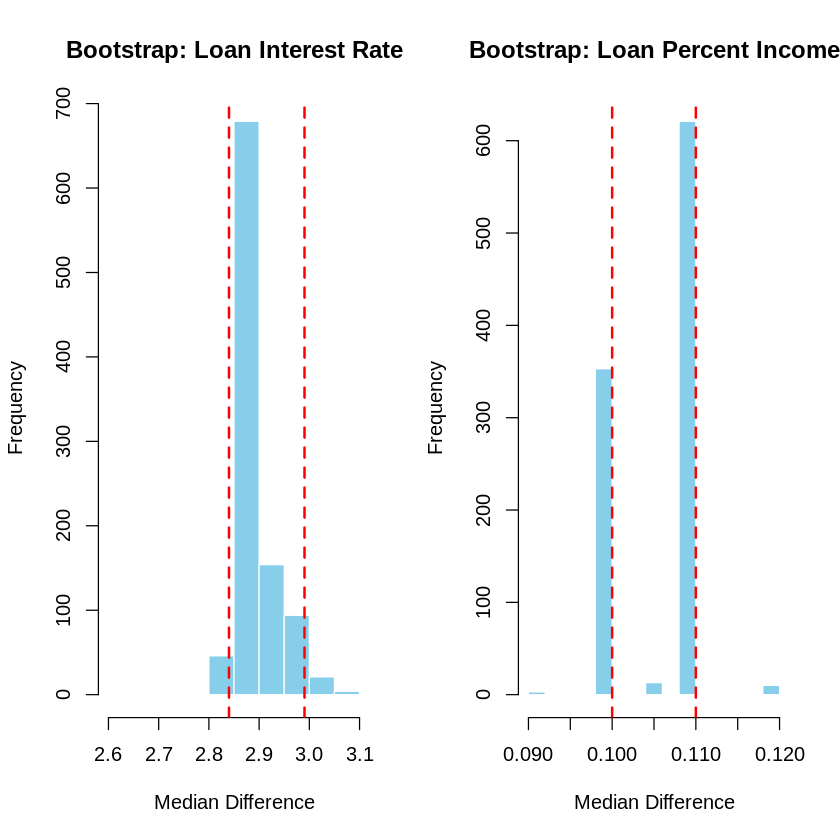

In [ ]:
set.seed(123)

start_time <- Sys.time()
# Define the bootstrap function
bootstrap_median_diff <- function(data, predictor, response, n_bootstrap = 1000, ci_level = 0.95) {
  # Split data into groups based on response
  group1 <- data[[predictor]][data[[response]] == 1]  # Defaulters
  group2 <- data[[predictor]][data[[response]] == 0]  # Non-defaulters

  # Observed median difference
  observed_median_diff <- median(group1) - median(group2)

  # Bootstrap sampling
  bootstrap_diffs <- numeric(n_bootstrap)
  set.seed(123)  # For reproducibility
  for (i in 1:n_bootstrap) {
    resample_group1 <- sample(group1, size = length(group1), replace = TRUE)
    resample_group2 <- sample(group2, size = length(group2), replace = TRUE)
    bootstrap_diffs[i] <- median(resample_group1) - median(resample_group2)
  }

  # Confidence interval
  lower_bound <- quantile(bootstrap_diffs, probs = (1 - ci_level) / 2)
  upper_bound <- quantile(bootstrap_diffs, probs = 1 - (1 - ci_level) / 2)

  # Return results
  list(
    observed_median_diff = observed_median_diff,
    ci_lower = lower_bound,
    ci_upper = upper_bound,
    bootstrap_diffs = bootstrap_diffs
  )
}

# Run the bootstrap for Loan Interest Rate
result_interest <- bootstrap_median_diff(data, predictor = "loan_int_rate", response = "loan_status")
cat("Loan Interest Rate - Observed Median Difference:", result_interest$observed_median_diff, "\n")
cat("Loan Interest Rate - 95% CI: [", result_interest$ci_lower, ",", result_interest$ci_upper, "]\n")

# Run the bootstrap for Loan Percent Income
result_income <- bootstrap_median_diff(data, predictor = "loan_percent_income", response = "loan_status")
cat("Loan Percent Income - Observed Median Difference:", result_income$observed_median_diff, "\n")
cat("Loan Percent Income - 95% CI: [", result_income$ci_lower, ",", result_income$ci_upper, "]\n")

# Plot bootstrap distributions
par(mfrow = c(1, 2))
hist(result_interest$bootstrap_diffs, main = "Bootstrap: Loan Interest Rate",
     xlab = "Median Difference", col = "skyblue", border = "white")
abline(v = c(result_interest$ci_lower, result_interest$ci_upper), col = "red", lwd = 2, lty = 2)

hist(result_income$bootstrap_diffs, main = "Bootstrap: Loan Percent Income",
     xlab = "Median Difference", col = "skyblue", border = "white")
abline(v = c(result_income$ci_lower, result_income$ci_upper), col = "red", lwd = 2, lty = 2)


results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

## Monte Carlo

In [ ]:
# Monte Carlo simulation function
monte_carlo_mean <- function(data, n_simulations) {
  loan_int_rate <- data$loan_int_rate
  loan_percent_income <- data$loan_percent_income

  mc_mean_interest_rate <- numeric(n_simulations)
  mc_mean_percent_income <- numeric(n_simulations)

  # Perform Monte Carlo simulation
  for (i in 1:n_simulations) {
    sampled_data <- data[sample(1:nrow(data), replace = TRUE), ]

    mc_mean_interest_rate[i] <- mean(sampled_data$loan_int_rate, na.rm = TRUE)
    mc_mean_percent_income[i] <- mean(sampled_data$loan_percent_income, na.rm = TRUE)
  }

  results <- data.frame(
    mean_interest_rate = mc_mean_interest_rate,
    mean_percent_income = mc_mean_percent_income
  )

  return(results)
}


In [ ]:
start_time <- Sys.time()

# Number of Monte Carlo simulations
n_simulations <- 1000
mc_results <- monte_carlo_mean(data, n_simulations)

# Bias and standard error for Monte Carlo
mc_bias_interest_rate <- mean(mc_results$mean_interest_rate) - mean(data$loan_int_rate, na.rm = TRUE)
mc_bias_percent_income <- mean(mc_results$mean_percent_income) - mean(data$loan_percent_income, na.rm = TRUE)

mc_se_interest_rate <- sd(mc_results$mean_interest_rate)
mc_se_percent_income <- sd(mc_results$mean_percent_income)


results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

Runtime: 32.0179 


In [ ]:
cat("Monte Carlo Results:\n")
cat("Bias for Interest Rate:\n", mc_bias_interest_rate, "\n")
cat("Bias for Percent Income:\n", mc_bias_percent_income, "\n")
cat("\nStandard Errors:\n")
cat("Interest Rate SE:\n", mc_se_interest_rate, "\n")
cat("Percent Income SE:\n", mc_se_percent_income, "\n")


Monte Carlo Results:
Bias for Interest Rate:
 -9.58962e-05 
Bias for Percent Income:
 1.754226e-05 

Standard Errors:
Interest Rate SE:
 0.01869042 
Percent Income SE:
 0.0006003235 


In [ ]:
# Monte Carlo Simulation Function
monte_carlo_median_diff <- function(data_frame, predictor, response, n_simulations = 1000) {
  dataset <- as.data.frame(data)

  # Split data into groups based on response
  group1 <- data_frame[[predictor]][data_frame[[response]] == 1]  # Defaulters
  group2 <- data_frame[[predictor]][data_frame[[response]] == 0]  # Non-defaulters


  observed_median_diff <- median(group1, na.rm = TRUE) - median(group2, na.rm = TRUE)
  mc_median_diffs <- numeric(n_simulations)

  # Monte Carlo simulations
  set.seed(123)
  for (i in 1:n_simulations) {
    resample_group1 <- sample(group1, size = length(group1), replace = TRUE)
    resample_group2 <- sample(group2, size = length(group2), replace = TRUE)
    mc_median_diffs[i] <- median(resample_group1, na.rm = TRUE) - median(resample_group2, na.rm = TRUE)
  }

  # Confidence interval
  lower_bound <- quantile(mc_median_diffs, probs = 0.025)
  upper_bound <- quantile(mc_median_diffs, probs = 0.975)

  list(
    observed_median_diff = observed_median_diff,
    ci_lower = lower_bound,
    ci_upper = upper_bound,
    mc_median_diffs = mc_median_diffs
  )
}


In [ ]:
start_time <- Sys.time()
mc_result_interest <- monte_carlo_median_diff(data, predictor = "loan_int_rate", response = "loan_status")
cat("Loan Interest Rate - Observed Median Difference:", mc_result_interest$observed_median_diff, "\n")
cat("Loan Interest Rate - 95% CI: [", mc_result_interest$ci_lower, ",", mc_result_interest$ci_upper, "]\n")

mc_result_income <- monte_carlo_median_diff(data, predictor = "loan_percent_income", response = "loan_status")
cat("Loan Percent Income - Observed Median Difference:", mc_result_income$observed_median_diff, "\n")
cat("Loan Percent Income - 95% CI: [", mc_result_income$ci_lower, ",", mc_result_income$ci_upper, "]\n")


results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

Loan Interest Rate - Observed Median Difference: 2.87 
Loan Interest Rate - 95% CI: [ 2.84 , 2.990375 ]
Loan Percent Income - Observed Median Difference: 0.11 
Loan Percent Income - 95% CI: [ 0.1 , 0.11 ]
Runtime: 6.178163 


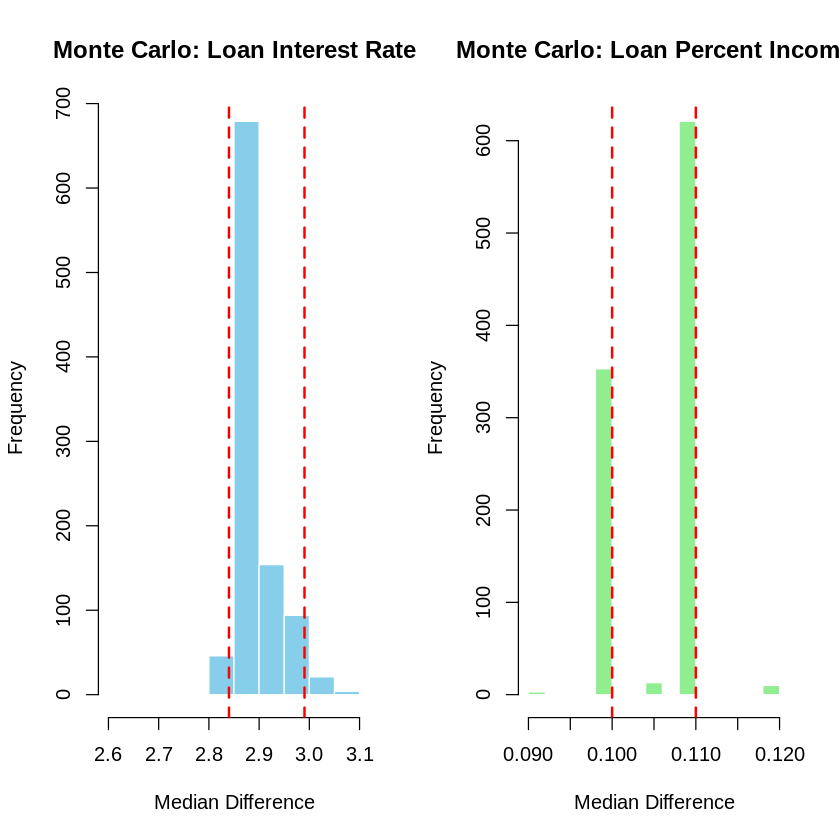

In [ ]:
# Plot
par(mfrow = c(1, 2))
hist(mc_result_interest$mc_median_diffs, main = "Monte Carlo: Loan Interest Rate",
     xlab = "Median Difference", col = "skyblue", border = "white")
abline(v = c(mc_result_interest$ci_lower, mc_result_interest$ci_upper), col = "red", lwd = 2, lty = 2)

hist(mc_result_income$mc_median_diffs, main = "Monte Carlo: Loan Percent Income",
     xlab = "Median Difference", col = "lightgreen", border = "white")
abline(v = c(mc_result_income$ci_lower, mc_result_income$ci_upper), col = "red", lwd = 2, lty = 2)


## Importance Sampling

In [ ]:
install.packages("mvtnorm")
library(mvtnorm)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
start_time <- Sys.time()

# Weighted statistics functions
weighted_mean <- function(values, weights) {
  sum(weights * values) / sum(weights)
}

weighted_median <- function(values, weights) {
  # Sort by values
  sorted <- data.frame(values = values, weights = weights) %>%
    arrange(values)
  sorted$cum_weights <- cumsum(sorted$weights)
  total_weight <- sum(sorted$weights)
  median_index <- which(sorted$cum_weights >= total_weight / 2)[1]
  sorted$values[median_index]
}

# Convert loan_status to numeric if not already
cleaned_credit_data$loan_status <- as.numeric(cleaned_credit_data$loan_status)

# Split data into default and non-default groups
default_data <- cleaned_credit_data %>% filter(loan_status == 1)
nondefault_data <- cleaned_credit_data %>% filter(loan_status == 0)

# Fit logistic regression model on the entire data (you could also fit separately,
# but generally, you might want one model trained on all data)
model <- glm(loan_status ~ loan_int_rate + loan_percent_income,
             data = cleaned_credit_data, family = binomial(link = "logit"))

# A function to perform importance sampling for a given group (default or non-default)
importance_sampling_group <- function(data, model, n_simulations) {
  # Compute means and covariance for this group's distribution
  group_means <- colMeans(data[, c("loan_int_rate", "loan_percent_income")], na.rm = TRUE)
  group_cov <- cov(data[, c("loan_int_rate", "loan_percent_income")], use = "complete.obs")

  # Define target distribution f for this group
  f <- function(x, y) {
    dmvnorm(cbind(x, y), mean = group_means, sigma = group_cov)
  }

  # Define proposal distribution g
  # Adjust proposal mean/cov to ensure coverage
  proposal_mean <- group_means + c(-0.5, -0.01)
  proposal_cov <- group_cov * 2

  g <- function(x, y) {
    dmvnorm(cbind(x, y), mean = proposal_mean, sigma = proposal_cov)
  }

  # Run importance sampling
  mean_ir <- numeric(n_simulations)
  median_ir <- numeric(n_simulations)
  mean_pinc <- numeric(n_simulations)
  median_pinc <- numeric(n_simulations)

  for (i in seq_len(n_simulations)) {
    # Sample from proposal
    samples <- mvrnorm(n = nrow(data), mu = proposal_mean, Sigma = proposal_cov)
    colnames(samples) <- c("loan_int_rate", "loan_percent_income")
    samples_df <- as.data.frame(samples)

    # Compute weights w = f/g
    f_val <- f(samples_df$loan_int_rate, samples_df$loan_percent_income)
    g_val <- g(samples_df$loan_int_rate, samples_df$loan_percent_income)
    w <- f_val / g_val

    # Compute weighted mean/median of interest_rate and percent_income
    mean_ir[i] <- weighted_mean(samples_df$loan_int_rate, w)
    median_ir[i] <- weighted_median(samples_df$loan_int_rate, w)
    mean_pinc[i] <- weighted_mean(samples_df$loan_percent_income, w)
    median_pinc[i] <- weighted_median(samples_df$loan_percent_income, w)
  }

  importance_results <- data.frame(
    mean_interest_rate = mean_ir,
    median_interest_rate = median_ir,
    mean_percent_income = mean_pinc,
    median_percent_income = median_pinc
  )

  # Compute true stats for this group
  true_stats <- data.frame(
    mean_interest_rate = mean(data$loan_int_rate, na.rm = TRUE),
    median_interest_rate = median(data$loan_int_rate, na.rm = TRUE),
    mean_percent_income = mean(data$loan_percent_income, na.rm = TRUE),
    median_percent_income = median(data$loan_percent_income, na.rm = TRUE)
  )

  # Create final_results for this group
  final_results <- data.frame(
    Statistic = c("Mean Interest Rate", "Median Interest Rate",
                  "Mean Percent Income", "Median Percent Income"),
    Weighted = c(
      mean(importance_results$mean_interest_rate),
      mean(importance_results$median_interest_rate),
      mean(importance_results$mean_percent_income),
      mean(importance_results$median_percent_income)
    ),
    True = c(
      true_stats$mean_interest_rate,
      true_stats$median_interest_rate,
      true_stats$mean_percent_income,
      true_stats$median_percent_income
    ),
    Bias = c(
      mean(importance_results$mean_interest_rate) - true_stats$mean_interest_rate,
      mean(importance_results$median_interest_rate) - true_stats$median_interest_rate,
      mean(importance_results$mean_percent_income) - true_stats$mean_percent_income,
      mean(importance_results$median_percent_income) - true_stats$median_percent_income
    ),
    SE = c(
      sd(importance_results$mean_interest_rate),
      sd(importance_results$median_interest_rate),
      sd(importance_results$mean_percent_income),
      sd(importance_results$median_percent_income)
    )
  )

  return(list(final_results = final_results, importance_results = importance_results))
}

# Set parameters
set.seed(123)
n_simulations <- 1000

# Run importance sampling for defaults
default_results <- importance_sampling_group(default_data, model, n_simulations)
default_final <- default_results$final_results
cat("Default Group Results:\n")
print(default_final)

# Run importance sampling for non-defaults
nondefault_results <- importance_sampling_group(nondefault_data, model, n_simulations)
nondefault_final <- nondefault_results$final_results
cat("\nNon-Default Group Results:\n")
print(nondefault_final)



results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

Default Group Results:
              Statistic   Weighted      True          Bias          SE
1    Mean Interest Rate 13.1240102 13.123509  5.016161e-04 0.039841254
2  Median Interest Rate 13.1234423 13.490000 -3.665577e-01 0.062776181
3   Mean Percent Income  0.2462854  0.246256  2.930888e-05 0.001605115
4 Median Percent Income  0.2462394  0.240000  6.239429e-03 0.002506695

Non-Default Group Results:
              Statistic   Weighted       True          Bias           SE
1    Mean Interest Rate 10.4634442 10.4635189 -7.469890e-05 0.0194698552
2  Median Interest Rate 10.4636886 10.6200000 -1.563114e-01 0.0304605853
3   Mean Percent Income  0.1482586  0.1482626 -4.018867e-06 0.0005704115
4 Median Percent Income  0.1482432  0.1300000  1.824325e-02 0.0008674584
Runtime: 28.08679 


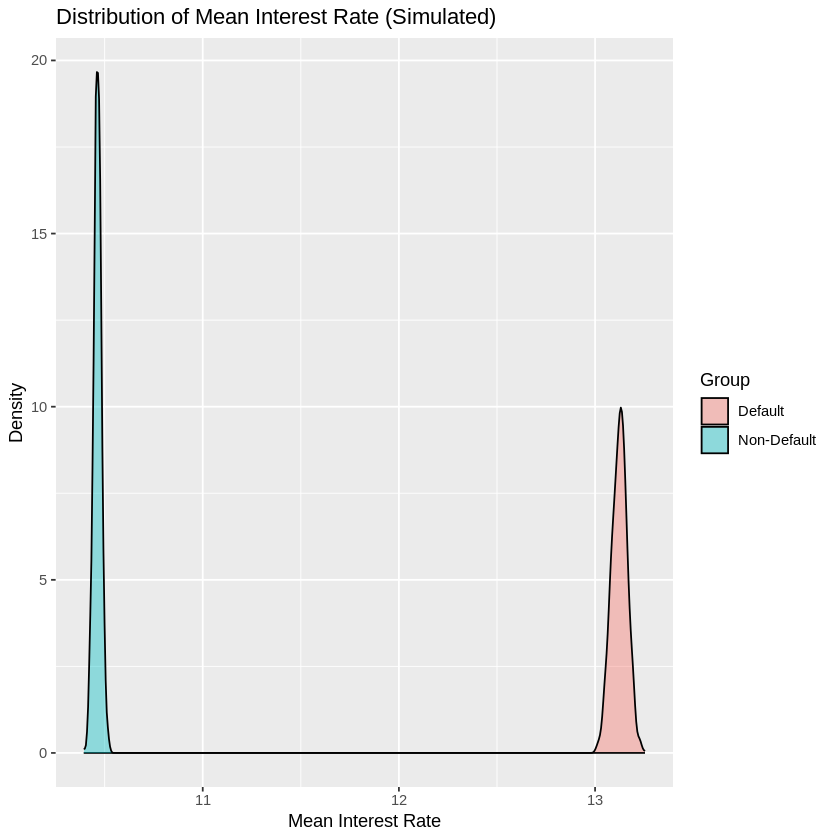

T-test for Mean Interest Rate:

	Welch Two Sample t-test

data:  default_imp$mean_interest_rate and nondefault_imp$mean_interest_rate
t = 1897.3, df = 1450.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.657815 2.663317
sample estimates:
mean of x mean of y 
 13.12401  10.46344 



T-test for Mean Percent Income:

	Welch Two Sample t-test

data:  default_imp$mean_percent_income and nondefault_imp$mean_percent_income
t = 1819.8, df = 1247.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09792110 0.09813246
sample estimates:
mean of x mean of y 
0.2462854 0.1482586 





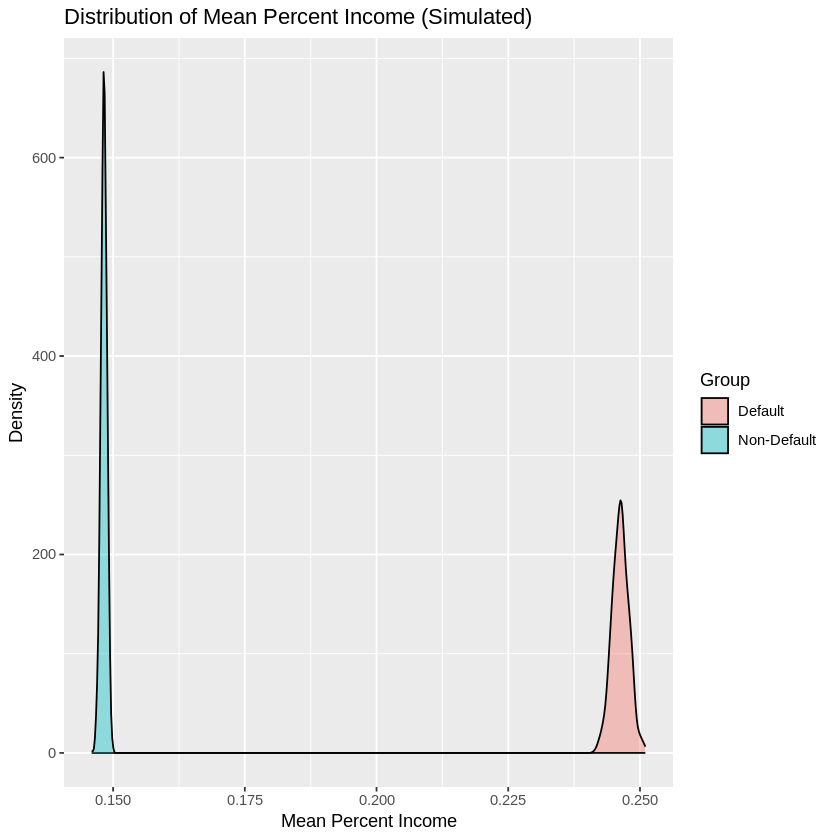

In [ ]:
library(ggplot2)
library(dplyr)

# Assuming you have run the previous code and obtained:
# default_results and nondefault_results

# Extract the simulation outcomes
default_imp <- default_results$importance_results
nondefault_imp <- nondefault_results$importance_results

# 1. Plot Mean Distributions
# We will plot histograms (or density plots) of the simulated weighted mean interest rates
# and mean percent incomes for both groups.

# Combine data for plotting
default_imp$Group <- "Default"
nondefault_imp$Group <- "Non-Default"

combined_data <- rbind(
  default_imp %>% dplyr::select(mean_interest_rate, mean_percent_income, Group),
  nondefault_imp %>% dplyr::select(mean_interest_rate, mean_percent_income, Group)
)

# Plot distributions for mean interest rate
ggplot(combined_data, aes(x = mean_interest_rate, fill = Group)) +
  geom_density(alpha = 0.4) +
  labs(title = "Distribution of Mean Interest Rate (Simulated)",
       x = "Mean Interest Rate", y = "Density")

# Plot distributions for mean percent income
ggplot(combined_data, aes(x = mean_percent_income, fill = Group)) +
  geom_density(alpha = 0.4) +
  labs(title = "Distribution of Mean Percent Income (Simulated)",
       x = "Mean Percent Income", y = "Density")

# 2. Hypothesis Testing for Differences
# Let's test if there's a significant difference in mean_interest_rate between the two groups.
# Null Hypothesis H0: The two groups have the same mean interest rate
# Alternative H1: The means differ

test_interest <- t.test(default_imp$mean_interest_rate, nondefault_imp$mean_interest_rate)
test_percent <- t.test(default_imp$mean_percent_income, nondefault_imp$mean_percent_income)

cat("T-test for Mean Interest Rate:\n")
print(test_interest)
cat("\n\n")

cat("T-test for Mean Percent Income:\n")
print(test_percent)
cat("\n\n")


##Permutation Test

Loan Interest Rate - Observed Statistic: 2.65999 
Loan Interest Rate - P-value: 0 
Loan Percent Income - Observed Statistic: 0.09799345 
Loan Percent Income - P-value: 0 
Runtime: 4.139207 


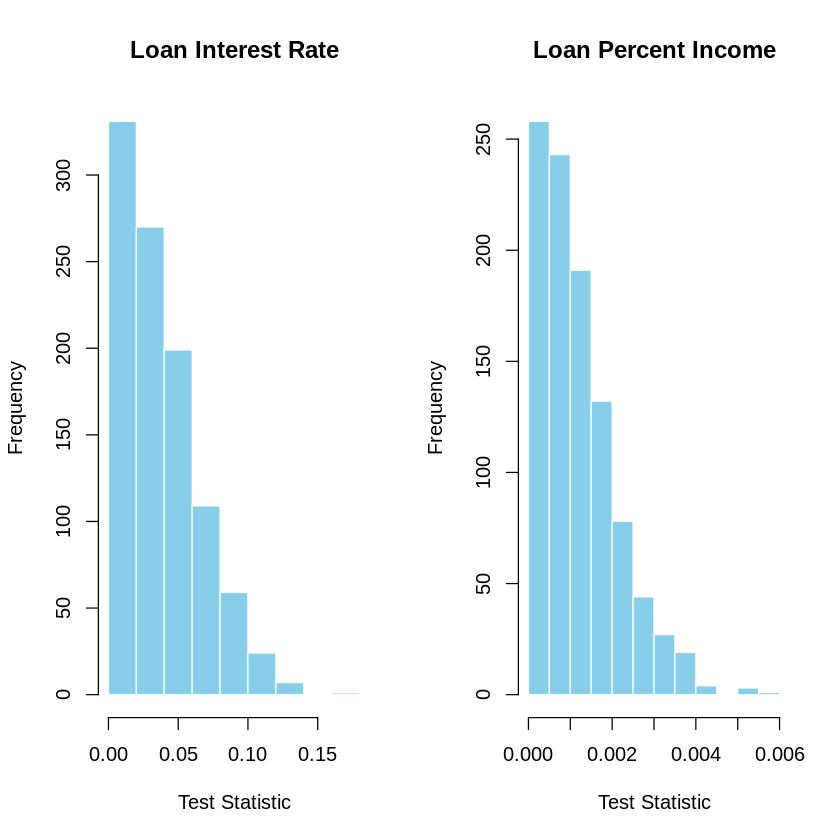

In [ ]:
start_time <- Sys.time()

# Load the dataset
data <- cleaned_credit_data

# Define the permutation test function
two_sample_permutation_test <- function(data, predictor, response, n_permutations = 1000) {
  # Split data into two groups based on the response variable
  group1 <- data[[predictor]][data[[response]] == 1]  # Defaulters
  group2 <- data[[predictor]][data[[response]] == 0]  # Non-Defaulters

  # Calculate the observed difference in means
  observed_stat <- abs(mean(group1) - mean(group2))

  # Combine all predictor values
  combined_data <- c(group1, group2)
  n1 <- length(group1)

  # Perform permutations
  permuted_stats <- numeric(n_permutations)
  for (i in 1:n_permutations) {
    permuted_labels <- sample(combined_data)  # Permute the data
    permuted_group1 <- permuted_labels[1:n1]
    permuted_group2 <- permuted_labels[(n1 + 1):length(permuted_labels)]
    permuted_stats[i] <- abs(mean(permuted_group1) - mean(permuted_group2))
  }

  # Calculate the p-value
  p_value <- mean(permuted_stats >= observed_stat)

  # Return results
  list(
    observed_stat = observed_stat,
    p_value = p_value,
    permuted_stats = permuted_stats
  )
}

# Run the test for Loan Interest Rate
set.seed(123)  # For reproducibility
result_interest <- two_sample_permutation_test(data, predictor = "loan_int_rate", response = "loan_status")
cat("Loan Interest Rate - Observed Statistic:", result_interest$observed_stat, "\n")
cat("Loan Interest Rate - P-value:", result_interest$p_value, "\n")

# Run the test for Loan Percent Income
result_income <- two_sample_permutation_test(data, predictor = "loan_percent_income", response = "loan_status")
cat("Loan Percent Income - Observed Statistic:", result_income$observed_stat, "\n")
cat("Loan Percent Income - P-value:", result_income$p_value, "\n")

# Plot permutation distributions
par(mfrow = c(1, 2))
hist(result_interest$permuted_stats, main = "Loan Interest Rate",
     xlab = "Test Statistic", col = "skyblue", border = "white")
abline(v = result_interest$observed_stat, col = "red", lwd = 2, lty = 2)

hist(result_income$permuted_stats, main = "Loan Percent Income",
     xlab = "Test Statistic", col = "skyblue", border = "white")
abline(v = result_income$observed_stat, col = "red", lwd = 2, lty = 2)


results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")


## Gibbs Sampling

In [ ]:
# Extract relevant columns
data_subset <- data[, c("loan_int_rate", "loan_percent_income", "loan_status")]

# Scale predictors for numerical stability
data_subset$loan_int_rate <- scale(data_subset$loan_int_rate)
data_subset$loan_percent_income <- scale(data_subset$loan_percent_income)

# Check structure
str(data_subset)

'data.frame':	28632 obs. of  3 variables:
 $ loan_int_rate      : num [1:28632, 1] 0.0311 0.5668 1.2975 1.0003 -1.2076 ...
  ..- attr(*, "scaled:center")= num 11
  ..- attr(*, "scaled:scale")= num 3.23
 $ loan_percent_income: num [1:28632, 1] -0.653 3.766 3.389 3.578 0.757 ...
  ..- attr(*, "scaled:center")= num 0.169
  ..- attr(*, "scaled:scale")= num 0.106
 $ loan_status        : num  0 1 1 1 1 1 1 1 1 1 ...


Posterior Mean (beta0): -0.8737837 
Posterior Mean (beta1 - loan_int_rate): 0.2782461 
Posterior Mean (beta2 - loan_percent_income): 0.3425336 
Runtime: 15.79434 


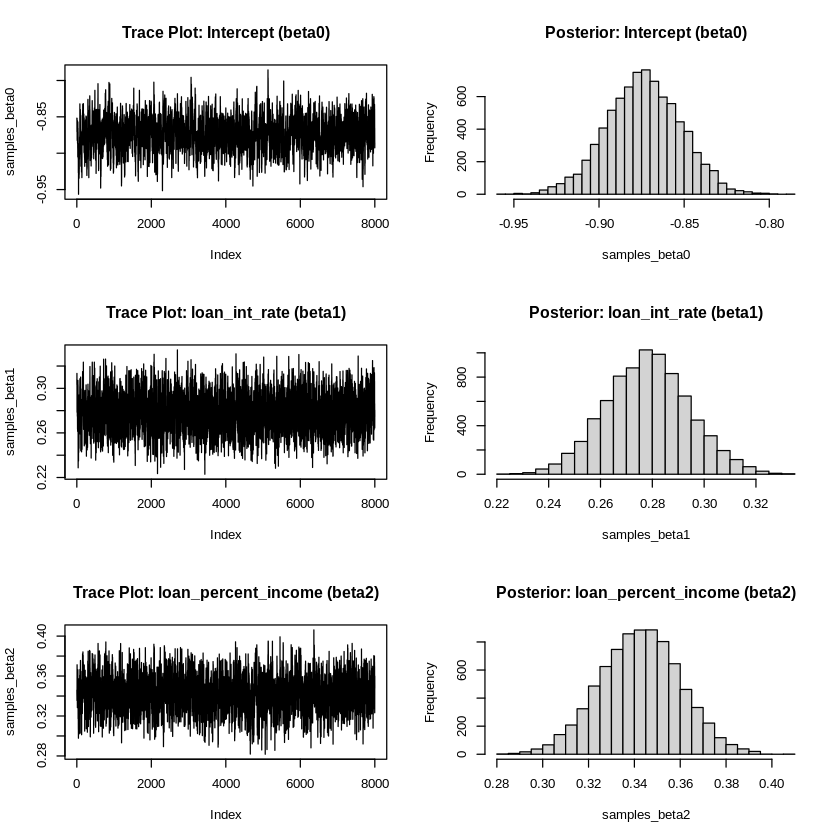

In [ ]:
start_time = Sys.time()

# Gibbs Sampling for Logistic Regression
set.seed(123)

# Initialize parameters
n_iter <- 10000  # Number of iterations
burn_in <- 2000  # Burn-in period
N <- nrow(data_subset)
beta0 <- 0       # Intercept
beta1 <- 0       # Coefficient for loan_int_rate
beta2 <- 0       # Coefficient for loan_percent_income
sigma2 <- 10     # Variance of priors

# Storage for samples
samples_beta0 <- numeric(n_iter)
samples_beta1 <- numeric(n_iter)
samples_beta2 <- numeric(n_iter)

# Logistic function
logistic <- function(x) {
  1 / (1 + exp(-x))
}

# Gibbs sampling loop
for (iter in 1:n_iter) {
  # Sample beta0
  eta <- beta0 + beta1 * data_subset$loan_int_rate + beta2 * data_subset$loan_percent_income
  mu <- logistic(eta)
  w <- mu * (1 - mu)
  z <- data_subset$loan_status - mu + eta
  v_beta0 <- 1 / (sum(w) + 1 / sigma2)
  m_beta0 <- v_beta0 * sum(z * w)
  beta0 <- rnorm(1, mean = m_beta0, sd = sqrt(v_beta0))

  # Sample beta1
  v_beta1 <- 1 / (sum(w * data_subset$loan_int_rate^2) + 1 / sigma2)
  m_beta1 <- v_beta1 * sum(data_subset$loan_int_rate * z * w)
  beta1 <- rnorm(1, mean = m_beta1, sd = sqrt(v_beta1))

  # Sample beta2
  v_beta2 <- 1 / (sum(w * data_subset$loan_percent_income^2) + 1 / sigma2)
  m_beta2 <- v_beta2 * sum(data_subset$loan_percent_income * z * w)
  beta2 <- rnorm(1, mean = m_beta2, sd = sqrt(v_beta2))

  # Store samples
  samples_beta0[iter] <- beta0
  samples_beta1[iter] <- beta1
  samples_beta2[iter] <- beta2
}

# Discard burn-in samples
samples_beta0 <- samples_beta0[-(1:burn_in)]
samples_beta1 <- samples_beta1[-(1:burn_in)]
samples_beta2 <- samples_beta2[-(1:burn_in)]

# Posterior summaries
cat("Posterior Mean (beta0):", mean(samples_beta0), "\n")
cat("Posterior Mean (beta1 - loan_int_rate):", mean(samples_beta1), "\n")
cat("Posterior Mean (beta2 - loan_percent_income):", mean(samples_beta2), "\n")

# Diagnostics and visualization
par(mfrow = c(3, 2))
plot(samples_beta0, type = "l", main = "Trace Plot: Intercept (beta0)")
hist(samples_beta0, breaks = 30, main = "Posterior: Intercept (beta0)")

plot(samples_beta1, type = "l", main = "Trace Plot: loan_int_rate (beta1)")
hist(samples_beta1, breaks = 30, main = "Posterior: loan_int_rate (beta1)")

plot(samples_beta2, type = "l", main = "Trace Plot: loan_percent_income (beta2)")
hist(samples_beta2, breaks = 30, main = "Posterior: loan_percent_income (beta2)")

results <- numeric(1e6)
for (i in 1:1e6) {
  results[i] <- sqrt(i)
}

end_time <- Sys.time()
runtime <- end_time - start_time
cat("Runtime:", runtime, "\n")

## Ordinary Least Square

In [ ]:
model = lm(loan_status ~ loan_int_rate + loan_percent_income, data = cleaned_credit_data)

summary(model)


Call:
lm(formula = loan_status ~ loan_int_rate + loan_percent_income, 
    data = cleaned_credit_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04529 -0.23975 -0.09759  0.09331  1.18153 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.4267062  0.0080117  -53.26   <2e-16 ***
loan_int_rate        0.0378846  0.0006662   56.86   <2e-16 ***
loan_percent_income  1.3280073  0.0202289   65.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3613 on 28629 degrees of freedom
Multiple R-squared:  0.2309,	Adjusted R-squared:  0.2309 
F-statistic:  4298 on 2 and 28629 DF,  p-value: < 2.2e-16


In [ ]:
predicted_values <- predict(model)
prediction_error <- cleaned_credit_data$loan_status - predicted_values
summary(prediction_error)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.04529 -0.23975 -0.09759  0.00000  0.09331  1.18153 

In [ ]:
MAE <- mean(abs(prediction_error))
RMSE <- sqrt(mean(prediction_error^2))

cat("Mean Absolute Error (MAE):", MAE, "\n")
cat("Root Mean Squared Error (RMSE):", RMSE, "\n")

Mean Absolute Error (MAE): 0.2785129 
Root Mean Squared Error (RMSE): 0.3612583 


In [ ]:
binary_predictions <- ifelse(predicted_values >= 0.5, 1, 0)
# Actual values
actual_values <- data$loan_status

# Confusion Matrix Components
TP <- sum(binary_predictions == 1 & actual_values == 1) # True Positives
TN <- sum(binary_predictions == 0 & actual_values == 0) # True Negatives
FP <- sum(binary_predictions == 1 & actual_values == 0) # False Positives
FN <- sum(binary_predictions == 0 & actual_values == 1) # False Negatives

# Calculate metrics
accuracy <- (TP + TN) / length(actual_values) # Accuracy
precision <- TP / (TP + FP) # Precision
recall <- TP / (TP + FN) # Recall
f1_score <- 2 * (precision * recall) / (precision + recall) # F1-Score

# Display results
cat("Model Metrics:\n")
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1-Score:", f1_score, "\n")

Model Metrics:
Accuracy: 0.8219824 
Precision: 0.722334 
Recall: 0.2894228 
F1-Score: 0.4132612 


## Weighted Least Square

In [ ]:
residuals_ols <- resid(model)
# Error Variance
error_variances <- residuals_ols^2
# Weights
weights <- 1 / error_variances

In [ ]:
# WLS Model
wls_model <- lm(loan_status ~ loan_int_rate + loan_percent_income,
                data = cleaned_credit_data, weights = weights)

summary(wls_model)


Call:
lm(formula = loan_status ~ loan_int_rate + loan_percent_income, 
    data = cleaned_credit_data, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.2299 -0.8930 -0.8919  0.8917 26.7131 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.3804878  0.0010615  -358.5   <2e-16 ***
loan_int_rate        0.0337622  0.0000952   354.6   <2e-16 ***
loan_percent_income  1.1869133  0.0032517   365.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9681 on 28629 degrees of freedom
Multiple R-squared:  0.8235,	Adjusted R-squared:  0.8235 
F-statistic: 6.677e+04 on 2 and 28629 DF,  p-value: < 2.2e-16


In [ ]:
wls_predicted_values <- predict(wls_model)

# Prediction errors
wls_prediction_error <- cleaned_credit_data$loan_status - wls_predicted_values

wls_MAE <- mean(abs(wls_prediction_error))
wls_RMSE <- sqrt(mean(wls_prediction_error^2))

cat("Weighted Least Squares Model Metrics:\n")
cat("Mean Absolute Error (MAE):", wls_MAE, "\n")
cat("Root Mean Squared Error (RMSE):", wls_RMSE, "\n")

Weighted Least Squares Model Metrics:
Mean Absolute Error (MAE): 0.2718355 
Root Mean Squared Error (RMSE): 0.3626262 


In [ ]:
wls_binary_predictions <- ifelse(wls_predicted_values >= 0.5, 1, 0)
actual_values <- cleaned_credit_data$loan_status

# Confusion Matrix Components for WLS
wls_TP <- sum(wls_binary_predictions == 1 & actual_values == 1) # True Positives
wls_TN <- sum(wls_binary_predictions == 0 & actual_values == 0) # True Negatives
wls_FP <- sum(wls_binary_predictions == 1 & actual_values == 0) # False Positives
wls_FN <- sum(wls_binary_predictions == 0 & actual_values == 1) # False Negatives

wls_accuracy <- (wls_TP + wls_TN) / length(actual_values) # Accuracy
wls_precision <- wls_TP / (wls_TP + wls_FP) # Precision
wls_recall <- wls_TP / (wls_TP + wls_FN) # Recall
wls_f1_score <- 2 * (wls_precision * wls_recall) / (wls_precision + wls_recall) # F1-Score

cat("Weighted Least Squares Model Metrics:\n")
cat("Accuracy:", wls_accuracy, "\n")
cat("Precision:", wls_precision, "\n")
cat("Recall:", wls_recall, "\n")
cat("F1-Score:", wls_f1_score, "\n")

Weighted Least Squares Model Metrics:
Accuracy: 0.8129016 
Precision: 0.7672359 
Recall: 0.1955821 
F1-Score: 0.311705 
